In [2]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### helper functions

In [70]:
def posterior_grid_approx(prior, successes=6, tosses=9):
    '''    
        This function performs a grid approximation on posterior distribution, 
        given prior and observed data following binomial distribution. 
        
        Parameters:
            prior: 1-D np.array
                Prior belief on parameter distribution before seeing the data. 
                The size should equal to the number of grid points for approximation.
           
            successes: int
                Number of successs.
           
            tosses: int
                Number of trials. 
       
        Returns:
            p_grid: 1-D np.array
                Evenly-spaced grid between 0 and 1.
               
            std_posterior: 1-D np.array
                The posterior distribution.
    '''
    # define grid
    p_grid = np.linspace(0, 1, prior.shape[0])
    
    # compute likelihood for each p in grid
    likelihood = stats.binom.pmf(k=successes, n=tosses, p=p_grid)
    
    # compute the product of prior and likehihood
    unstd_posterior = prior * likelihood
    
    # standardize the posterior
    std_posterior = unstd_posterior/unstd_posterior.sum()
    
    return p_grid, std_posterior

In [52]:
def plot_grid_appox(prior, successes=6, tosses=9, xlabel='probability of water', title=None):
    
    p_grid, posterior = posterior_grid_approx(prior, successes, tosses)
    
    plt.plot(p_grid, posterior, 'o-', label=f'{successes} successes from {tosses} trials')
    plt.xlabel(xlabel)
    plt.ylabel('posterior probability')
    plt.legend(loc=2)
    plt.title(title)
    
    return p_grid, posterior

### Easy.  
- 2E1. 2 & 4  
- 2E2. 3   
- 2E3. 1 & 4
- 2E4. As a human we cannot possibly see in our small world perspective how much the earth surface is exactly covered by water. Plus, under climate change and other factors, the water surface ratio constantly fluctuates. That said, given proper statistical modelling and geographical domain knowledge, researchers can make inferences on the probability of water. Under Bayesian perspective, we will say we believe that the ratio is around 0.7, given the data we see and the prior knowledge we have. 

### Median

#### 2M1.
Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior p.

<font color='darkred'/>In grid approximation, increasing # of points decreases each point's posterior by the same scale. It wont change the MLE. The standardlization step is a bit useless. In Quadratic approximation, Analytic Approximaiton, MCM, the area under the curve of posterior truly sums to 1.<font>

In [77]:
n_points = int(1e3)
# uniform prior
prior = np.ones((n_points))

(1) W,W,W

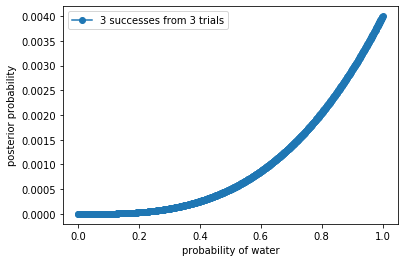

In [78]:
obs = 'W,W,W'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses)

(2) W,W,W,L

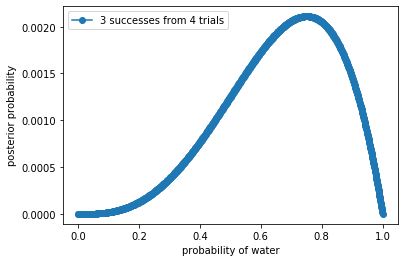

In [79]:
obs = 'W,W,W,L'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses)

(3) L,W,W,L,W,W,W

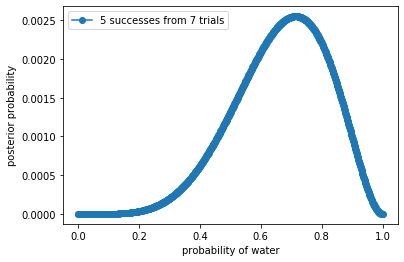

In [80]:
obs = 'L,W,W,L,W,W,W'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses)

#### 2M2.
Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

In [58]:
# truncated prior
n_points = int(1e3)
prior = (np.linspace(0,1,n_points) >= 0.5).astype(int)

(1) W,W,W

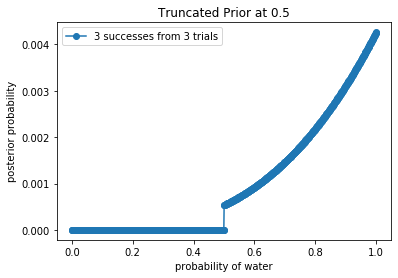

In [60]:
obs = 'W,W,W'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses, title='Truncated Prior at 0.5')

(2) W,W,W,L

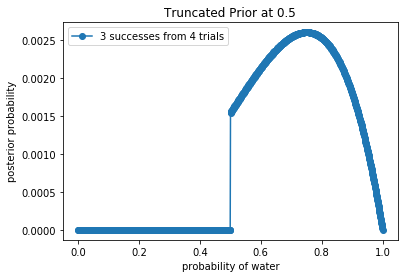

In [62]:
obs = 'W,W,W,L'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses, title='Truncated Prior at 0.5')

(3) L,W,W,L,W,W,W

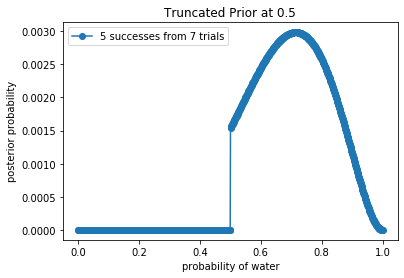

In [63]:
obs = 'L,W,W,L,W,W,W'.split(',')
tosses = len(obs)
successes = obs.count("W")
_, _ = plot_grid_appox(prior, successes, tosses, title='Truncated Prior at 0.5')

#### 2M3.
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” $P(Earth|land)$, is 0.23.

| Conjecture | Prior | Likelihood-seeing "L" | Unstd. Posterior | Std. Posterior |
| -----| -----| ------|------|------|
|Earth|0.5|0.3|0.15|0.23|
|Mars|0.5|1|0.5|0.77|

In [82]:
.15/.65

0.23076923076923075

The remaining exercises were done with pen and paper.